# OOP | Evolution Simulation

Write an object-oriented program that simulates evolution at three gene loci in a population of one hundred haploid individuals. Each locus has two alleles which differ slightly in fitness, and the overall fitness for an individual can be calculated from the fitness of the three loci using a multiplicative model (i.e., if the fitness scores for the alleles of a given individual are 1.0, 0.9, and 0.8, then the individual’s fitness is 1.0 * 0.9 * 0.8 = 0.72).

## Simulation Process

In every generation, the simulation proceeds in two stages:

1. **Selection Stage:** 
    - Each individual is potentially killed with the probability inversely proportional to its fitness. 
    - For each individual, a random number between 0 and 1 is picked, and if that number is greater than the individual’s fitness, it dies and is removed from the population.

2. **Reproduction Stage:** 
    - New individuals are added to the population to maintain a total of one hundred individuals. 
    - Alleles for each new individual are chosen by randomly selecting alleles from the current population. 
    - The chances of selecting a given allele are proportional to its frequency in the population as a whole.

## Output

At each generation, the program should calculate the frequency of all alleles and write them to a text file. 
At the end of the simulation, the frequencies can be plotted to show how they change over time. 

## Implementation

- Use `matplotlib`, `pandas`, and/or `numpy` for the plot.

### Example:

```python
# Python code for the simulation
class Population:
    # Implementation of the simulation
    pass

# Example usage
pop = Population()
pop.run_simulation(num_generations=100)
pop.write_frequencies_to_file("allele_frequencies.txt")


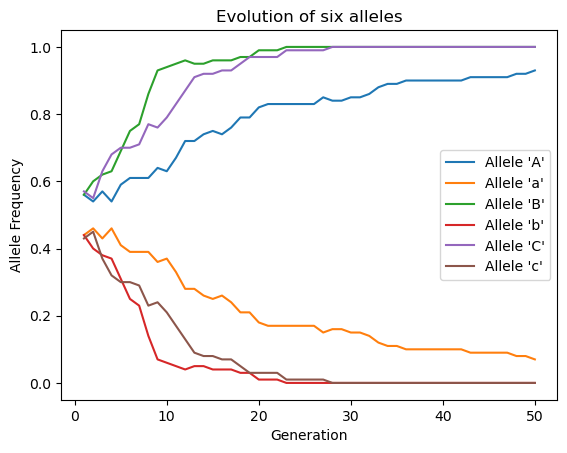

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class GeneLocus:
    def __init__(self, allele):
        self.allele = allele

    def get_fitness(self):
        return self.allele[1]

class Individual:
    def __init__(self, loci):
        self.loci = loci

    def calculate_fitness(self):
        return np.prod([locus.get_fitness() for locus in self.loci])

def simulate_evolution(num_generations, population_size, allele_pairs):
    population = [Individual([GeneLocus(random.choice(allele_pairs[0])),GeneLocus(random.choice(allele_pairs[1])), GeneLocus(random.choice(allele_pairs[2]))]) for i in range(population_size)]
    allele_frequencies = {'A': [], 'a': [], 'B': [], 'b': [], 'C': [], 'c': []}

    for generation in range(num_generations):
        # Selection
        population = [individual for individual in population if individual.calculate_fitness() >= random.uniform(0,1.0)]

        # Reproduction
        while len(population) < population_size:
            parent = random.choice(population)
            population.append(Individual([parent.loci[0], parent.loci[1], parent.loci[2]]))

        # Calculate allele frequencies
        allele_counts = {'A': 0, 'a': 0, 'B': 0, 'b': 0, 'C': 0, 'c': 0}
        for individual in population:
            for locus in individual.loci:
                allele_counts[locus.allele[0]] += 1

        for k,v in allele_counts.items():
            allele_frequencies[k].append(v / population_size)

    # Write frequencies to a text file
    with open("allele_frequencies.txt", "w") as file:
        file.write("Generation\tAllele 1 Frequency\tAllele 2 Frequency\tAllele 3 Frequency\t"
                   "Allele 4 Frequency\tAllele 5 Frequency\tAllele 6 Frequency\n")
        for i in range(num_generations):
            file.write(f"{i + 1}\t{allele_frequencies['A'][i]}\t{allele_frequencies['a'][i]}\t"
                       f"{allele_frequencies['B'][i]}\t{allele_frequencies['b'][i]}\t"
                       f"{allele_frequencies['C'][i]}\t{allele_frequencies['c'][i]}\n")

    # Plot allele frequencies over time
    df = pd.DataFrame({
        "Generation": range(1, num_generations + 1),
        "Allele 'A'": allele_frequencies['A'],
        "Allele 'a'": allele_frequencies['a'],
        "Allele 'B'": allele_frequencies['B'],
        "Allele 'b'": allele_frequencies['b'],
        "Allele 'C'": allele_frequencies['C'],
        "Allele 'c'": allele_frequencies['c'],
    })
    df.plot(x="Generation", y=["Allele 'A'", "Allele 'a'", "Allele 'B'", "Allele 'b'", "Allele 'C'", "Allele 'c'"], kind="line")
    plt.xlabel("Generation")
    plt.ylabel("Allele Frequency")
    plt.title("Evolution of six alleles")
    plt.show()

# Define three gene loci with different fitness values
alleles_pairs = [[('A',1.0), ('a',0.94)], [('B',1.0), ('b',0.76)], [('C',1.0), ('c',0.81)]]

# Set up simulation parameters
num_generations = 50
population_size = 100

# Run the simulation
simulate_evolution(num_generations, population_size, alleles_pairs)
